# Model to Predict Housing

**Melissa Belfer**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

For my analysis, I used columns from the dataset that contained over a 0.65 correlation to the sale price column.  I used different combinations of those independent variables to train linear regression models.  After analyzing the results of the scores of those models, I learned that just by increasing the amount of independent variables added to the model does not mean the score will go up.  There was a point that the score of the model went down with independent variables added.  There was a score of 0.78 for the final model used against the test dataset.

The linear regression equation for the model is below:

SalePrice = (17665.26545183 * OverallQual) + (25624.99501943 * ExterQual) + (41.07489011 * GrLivArea) + (79.59400665 * GarageArea) + (10179.51947658 * KitchenQual) + (-8875.89573741 * GarageCars) + -132883.48735087246


[Back to top](#Index)


## 1. Introduction

The problem I am trying to solve is predicting the sale price of houses.  I will do this by analyzing data, cleaning data, and building a linear regression model.  This will first involve reading in the dataset into a Pandas DataFrame for analysis.  After analyzing the columns and understanding what each column does, then I will focus on cleaning the dataset.  In order to clean the dataset I will convert any column that are category based that might be correlated to the sale price to a numeric column.  I will then look for null values in the columns.  I will either interpolate the columns that contain missing fields by replacing them with the average values or eliminating the column if the majority of the fields are missing.  Then I will get the correlation of the columns against the sale price column and choose the columns that have the strongest correlation to use for my model.  This is because the sale price column is the dependent variable in my linear regression model, and the columns with the highest correlation will be my independent variables in my model.  I will then select a few different sets of columns and create a linear regression model on those different sets of columns using the training dataset.  I will then compare the scores of those models to see what combination of independent variables produce the best score when applied on the test dataset.  This will result in a final model that can be used to predict sale prices of houses.




[Back to top](#Index)

## 2. The Data


[Back to top](#Index)

### 2.1 Import the Data


The libraries that I will use to create a linear regression model from a dataset are pandas, numpy, matplotlib, seaborn, and sklearn.  

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

The input data that will be used to train the model is coming from the csv _'houseSmallData.csv'_.  The input data contains 100 rows and 82 columns.

In [346]:
# Reading in the dataset that will be used to train our model
input_file = 'houseSmallData.csv'
data = pd.read_csv(input_file)

data


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [347]:
# The input data contains 100 rows and 82 columns
data.shape

(100, 82)

In [348]:
# Using the info function we are able to look at the count of null values and the data type associated with each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

I am able to sum the rows per column that contain null data.  By sorting this in descending order, I can show in the dataframe below what columns contain the most null values.  This will help me determine how I want to clean the data.

In [349]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
...,...
MasVnrType,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


[Back to top](#Index)

### 2.2 Data Exploration



In [350]:
# Extracting the data from the SalePrice column
salePrice = data['SalePrice']

The below code takes the SalePrice data from the input dataframe and calculates the statistics of mean, std, min, max, etc and puts it in a table.

In [351]:
pd.DataFrame(salePrice.describe())

,SalePrice
count,100.000000
mean,173820.660000
std,72236.552886
min,40000.000000
25%,129362.500000
50%,153750.000000
75%,207750.000000
max,438780.000000


The below code shows the sale price input data in a histogram. From the graph I can determine that the SalePrice data follows a log normal distribution.  I can also calculate the skew of the salePrice data and see there is ~1.178 skew.

In [352]:
salePrice.skew()

1.1783462304851948

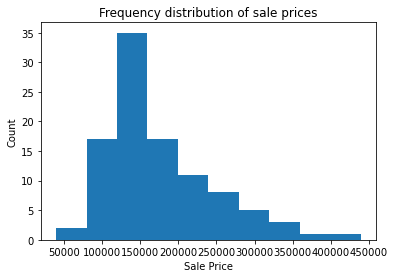

In [425]:
plt.hist(salePrice)
plt.title('Frequency distribution of sale prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
# plt.savefig('saleprice.jpg', bbox_inches="tight")

If I want the SalePrice data to follow a normal distribution, I can calculate the log of the values.  Below shows what the sale price data looks like after calculating the log of each value.  I also calculate the skew which is approximately -.096 after calculating the log of each value in the sale price column.

In [354]:
sp = np.log(salePrice)

sp.skew()

-0.09632240207755555

(array([ 1.,  0.,  3.,  7., 21., 26., 18., 13.,  9.,  2.]),
 array([10.59663473, 10.8361466 , 11.07565847, 11.31517034, 11.55468221,
        11.79419408, 12.03370595, 12.27321782, 12.51272969, 12.75224156,
        12.99175343]),
 <BarContainer object of 10 artists>)

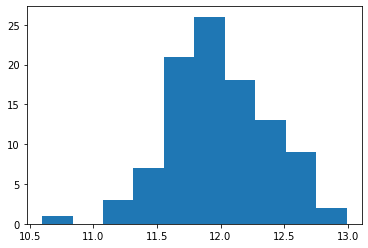

In [355]:
plt.hist(sp)

After looking at the data variables available.  My assumption was that the square footage of areas of the house would contain a postive correlation to the sale price of the house.  I also assumed that the overall quality and condition of the house would contain positive correlations.  Below contains plots that show the correlation of the following variables against the sale price data.  

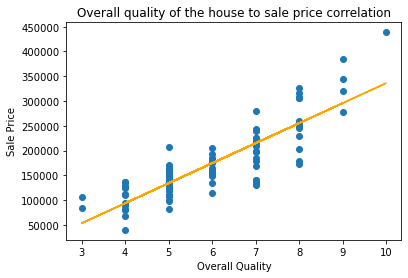

In [356]:
# The overall quality of the house has a strong positive correlation with the sale price of the house
x=data['OverallQual']
y=salePrice
plt.scatter(x, y)
plt.title("Overall quality of the house to sale price correlation")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')
# plt.savefig("overallqual.jpg", bbox_inches="tight")


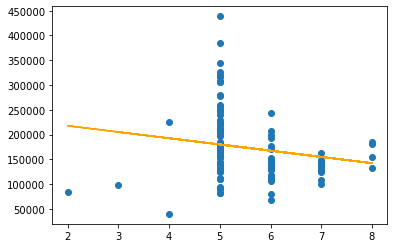

In [357]:
# I assumed that the overall condition of the house would have a strong positive correlation to the sale price, but the below graph does not show a strong correlation
x=data['OverallCond']
y=salePrice
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')

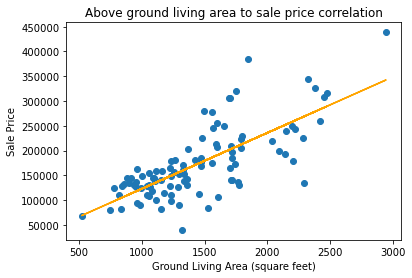

In [358]:
# The above ground living square footage has a positive correlation with the sale price
x=data['GrLivArea']
y=salePrice
plt.scatter(x, y)
plt.title("Above ground living area to sale price correlation")
plt.xlabel("Ground Living Area (square feet)")
plt.ylabel("Sale Price")
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')
# plt.savefig('grlivarea.jpg', bbox_inches="tight")


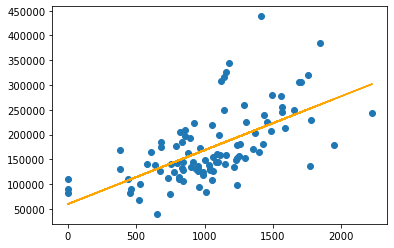

In [359]:
# The total basement square footage has a positive correlation to the sale price
x=data['TotalBsmtSF']
y=salePrice
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')

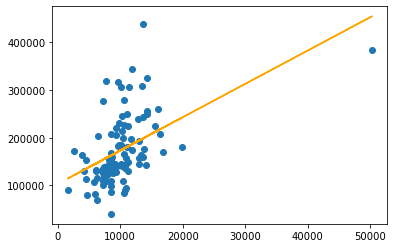

In [360]:
# I assumed that the Lot Size in square footage would contain a strong positive correlation to sale price. 
# It is hard to tell the correlation since there is an outlier in the graph
x=data['LotArea']
y=salePrice
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')


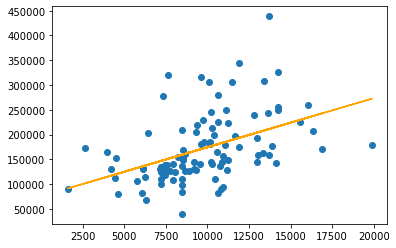

In [361]:
# I removed the outlier to get a better look at the correlation of the lot area to the sale price.
tmp = data.loc[data.LotArea < 20000]
x=tmp['LotArea']
y=tmp['SalePrice']
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')


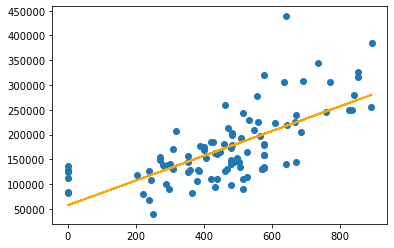

In [362]:
# The garage area square footage has a positive correlation with sale price
x=data['GarageArea']
y=salePrice
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')


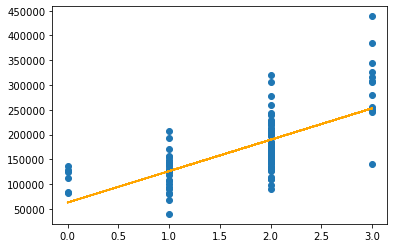

In [363]:
# This refers to the correlation of the amount of cars that can fit in the gargage and it's correlation to the sale price
x=data['GarageCars']
y=salePrice
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')

Since linear regression won't be able to handle the categorical information, I will convert some of the categorical values into a numerical column by finding and replacing the label with a number. Then I will look at the correlation of these values to the sale price.

I want to explore the correlation of the exterior quality and condition of the house to the sale price. I also want to check the heating quality/condition and whether the house has central air conditioning or not.  The other variable I want to see if it has a correlation to sale price is the kitchen quality.

Since ExterQual, ExterCond, KitchenQual, HeatingQC all have a rating from excellent to poor, I decided to replace the rating with a 1 to 5 rating (1 being poor and 5 being excellent). The CentralAir column contains a Y or N which decides if there is air conditioning or not in the house.  I replaced the Y with a 1 and N with 0.  

In [364]:
# Clean up columns to a numeric rating
cleanup_cols = {'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'CentralAir': {'N':0, 'Y':1},
    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}}

In [365]:
# Replaces the columns with the new values
new_df = data.replace(cleanup_cols)

In [366]:
tmp_corr = new_df.corr()
pd.DataFrame(tmp_corr['SalePrice'].loc[['ExterQual','ExterCond','HeatingQC','CentralAir','KitchenQual']])

,SalePrice
ExterQual,0.743234
ExterCond,0.029992
HeatingQC,0.537435
CentralAir,0.366800
KitchenQual,0.683071


Based on the dataframe above, I learn that the exterior quality and kitchen quality has a strong positive correlation to sale price. 

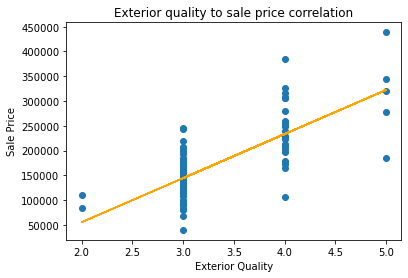

In [367]:
# The scatter plot shows that the exterior quality has a positive correlation to the sale price
x=new_df['ExterQual']
y=new_df['SalePrice']
plt.scatter(x, y)
plt.title("Exterior quality to sale price correlation")
plt.xlabel("Exterior Quality")
plt.ylabel("Sale Price")
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')
# plt.savefig('exterqual.jpg', bbox_inches="tight")

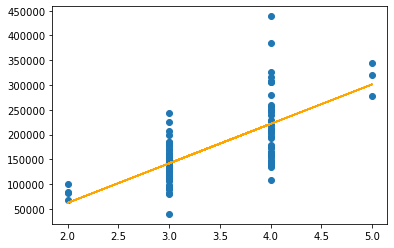

In [368]:
# The scatter plot shows the positive correlation of kitchen quality to the sale price
x=new_df['KitchenQual']
y=new_df['SalePrice']
plt.scatter(x, y)
a, b = np.polyfit(x, y, 1)
plt.plot( x, a*x+b, color='orange')

[Back to top](#Index)

### 2.3 Data Preparation




I first converted the categorical data I want to use in my model to a numeric value. Since there are missing values in the data, I replaced the null values with the average value in the column and afterwards dropped any null columns remaining. The following steps show in more detail what I did to clean the data.

1. Based on the data analysis that was done above, I decided to convert the following category based columns to numeric columns.  This will allow me to use these columns to create the linear regression model of sale prices. I changed the rating based system to a 5 star rating system of 5 being excellent and 1 being poor.  Then I replaced them in the dataset.

In [369]:
# Clean up columns to a numeric rating
cleanup_cols = {'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'CentralAir': {'N':0, 'Y':1},
    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}}
# Replaces the columns with the new values
data = data.replace(cleanup_cols)

2. All the columns that I will be using for creating a linear regression model are numeric columns; therefore, I filtered out all other data types from the source dataframe that are not numeric types.  The column count goes from 82 to 45.

In [370]:
# Select all the columns that are numeric
numeric = data.select_dtypes(include=[np.number])

numeric.shape

(100, 45)

3. After filtering out the columns wanted, I checked the null values in each column remaining. The column PoolQC contains 100 null values out of the 100 rows, the column LotFrontage contains 14 null values out of the 100 rows, and the GarageYrBlt column contains 6 nulls out of the 100 rows.

In [371]:
pd.DataFrame(numeric.isnull().sum().sort_values(ascending=False))

,0
PoolQC,100
LotFrontage,14
GarageYrBlt,6
Unnamed: 0,0
GarageArea,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
KitchenQual,0
TotRmsAbvGrd,0


4. I don't want to drop the rows that contain nulls in the columns LotFrontage and GarageYrBlt, and I also don't want to drop the columns since they can be useful for determining the linear regression model.  I decide to interpolate the null data in those columns to be replaced with the mean.  Then I verify if there are any remaining null values in the dataframe, which the PoolQC column contains only null values.

In [372]:
# Cleans up the data by replacing the null values with the mean
cleaned = numeric.interpolate()


In [373]:
pd.DataFrame(cleaned.isnull().sum().sort_values(ascending=False))

,0
PoolQC,100
Unnamed: 0,0
GarageArea,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
KitchenQual,0
TotRmsAbvGrd,0
Fireplaces,0
GarageYrBlt,0


5. Since the PoolQC column does not contain any data except null values, I decide to drop the column.  Then I verify if there are any null values remaining, and learn there are no longer null values in the dataframe.

In [374]:
clean_data = cleaned.dropna(axis=1)

In [375]:
pd.DataFrame(clean_data.isnull().sum().sort_values(ascending=False))

,0
Unnamed: 0,0
Id,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
KitchenQual,0
TotRmsAbvGrd,0
Fireplaces,0
GarageYrBlt,0


[Back to top](#Index)

### 2.4 Correlation


I used the cleaned data to perform the correlation. 

In [376]:
corr = clean_data.corr()

Since I just want to know how the other columns are correlated to the sale price column, I select the sale price column and sort in descending order.  I then select the top 8 rows to see the correlation to sale price.

In [377]:
sale_price_corr = pd.DataFrame(corr['SalePrice'].sort_values(ascending=False))[0:8]
cols = sale_price_corr.index
sale_price_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.855061
ExterQual,0.743234
GrLivArea,0.735129
GarageArea,0.688249
KitchenQual,0.683071
GarageCars,0.663441
YearBuilt,0.658636


Using the columns with the highest correlation to sales price, I then select those columns from the cleaned data and do a correlation mapping on those columns and display them in the heap map below.  The top most row in the heatmap shows the correlation values for the SalePrice column against the other columns selected. 

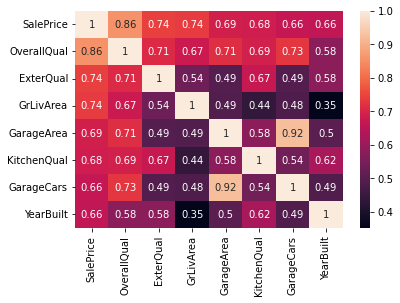

In [378]:
sns.heatmap(clean_data[cols].corr(), annot = True)
plt.savefig('heatmap.jpg',  bbox_inches="tight")

By looking at the correlation values to SalePrice, I learned that the OverallQual column contains the highest correlation to SalePrice.  The other columns that contain a high correlation to SalePrice are ExterQual, GrLivArea, GarageArea, KitchenQual, GarageCars, and YearBuilt, which all contain a correlation above 0.65.  Based on these correlations, I will use a combination of these columns to train my linear regression model.


[Back to top](#Index)

## 3. Project Description

Before analyzing the dataset, I made sure to clean the dataset by interpolating the columns that contained null values and replacing them with the mean.  I also converted a few columns that are category based to numeric columns.  This makes sure that my analysis is not limited to just numeric columns, and also doesn’t show an inaccurate representation of the data if it is missing fields.  I analyzed the following variables against the SalePrice column, OverallQual, ExterQual, GrLivArea, GarageArea, KitchenQual, GarageCars, YearBuilt, and HeatingQC.  I selected these columns because they contained a strong positive correlation to the SalePrice column.  My analysis showed that OverallQual, ExterQual, GrLivArea, GarageArea, KitchenQual, and GarageCars had a correlation over 0.65 to SalePrice and resulted in the highest score in the linear regression model.  


[Back to top](#Index)

### 3.1 Linear Regression

The machine learning algorithm that I use in this project is linear regression.  The specific type of linear regression algorithm used is the multiple linear regression algorithm. This entails that there are multiple independent variables used to create a model to predict one dependent variable.  This algorithm will try to predict the values in a continuous range.  It aims to assign the line of best fit, to assign the coefficients of the independent variables, and get the bias to have a small error.  The error is determined by the actual value minus the predicted value.  

The formula is y = m1x1 + m2x2 + m3x3 + … + mnxn + b where x1, x2, x3, … xn  represents the independent variables used to make the prediction of the dependent variable y.  The coefficients of the independent variables are m1, m2, m3, … mn, which represents the slopes of the x values.  The bias is represented by b in the formula, which could also be described as the intercept.  

One of the metrics calculated to determine how good the model is R squared, the score of the model, which lies between 0 to 1.  The closer R squared is to 1, the better the model is.  

In order to implement the model in Python, we import the linear_model from sklearn into the codebase.  We feed the dependent variables, x, from the training set DataFrame and the independent variable, y, from the training set DataFrame into the fit(x, y) function from sklearn.  This will return the model to us that is created.  We can extract the coefficients from the model by using model.coef_ and extract the bias by using model.intercept_.  After we create the model, we can use our test dataset to see how well our model holds against the new dataset.  By using model.score(x_test, y_test), we can get back the score of the model.  The variables x_test and y_test both represent the same columns used to train the data but the values are from the test dataset.  




In [379]:
# Set the cleaned dataset to the set of data that will be used to train the model
train = clean_data

In [380]:
# I use the LinearRegression function from sklearn to create the linear regression model
lr = linear_model.LinearRegression()

[Back to top](#Index)

### 3.2 Analysis 






In [381]:
# The columns that will be used to train the model
set_one = ['OverallQual', 'ExterQual']
set_two = ['OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual']
set_three = ['OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual', 'GarageCars']
set_four = ['OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual', 'GarageCars', 'YearBuilt']
set_five = ['OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual', 'GarageCars', 'YearBuilt', 'HeatingQC']
set_six = ['OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual','YearBuilt']

* x_train represents the indepedent columns with a high correlation to SalePrice that will be used to train the model
* y_train represents the depedent variable SalePrice that we are trying to predict
* The score of the model is r^2 which represents how much of the sale price data is explained by the X data variables.

Below uses different set of columns from the training dataset to train the linear regression model.  Then we use those sets to get the score of the model.  Below only contains the scores using the training dataset.

In [382]:
# Set one score
x_train = train[set_one]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.769776538943687

In [383]:
# Set two score
x_train = train[set_two]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.8237715289457415

In [384]:
# Set three score
x_train = train[set_three]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.824961751427764

In [385]:
# Set four score
x_train = train[set_four]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.8450299512449222

In [386]:
# Set five score
x_train = train[set_five]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.8451882567115233

In [387]:
# Set six score
x_train = train[set_six]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)
score = model.score(x_train, y_train)
score 

0.843716481795795

[Back to top](#Index)

### 3.3 Results




The results I discovered was that increasing the amount of independent variables did not mean the models score was going to increase.  After getting the score of the model on the training set, I tested each model on the test data.  I discovered that the highest score on the test data was column set three, with a score of 0.78.  

The other interesting discoveries was that the models score made a huge jump from column set one to column set two. 

The model's score went down on the test dataset on column set four through six with a score at ~0.75. The model's score from column set four through six did not change much. The score in the training dataset was ~.84 and the test dataset was ~.75.

The final column set that I decided to use for my model was of the following columns 'OverallQual', 'ExterQual', 'GrLivArea', 'GarageArea', 'KitchenQual', and 'GarageCars'. The score of the model on the training dataset with these columns was ~0.824 and the score on the test dataset was ~0.781. 

In [388]:
model_cols = set_three
x_train = train[model_cols]
y_train = train['SalePrice']
model = lr.fit(x_train, y_train)

In [389]:
# The coefficients for the model
model.coef_

array([17665.26545183, 25624.99501943,    41.07489011,    79.59400665,
       10179.51947658, -8875.89573741])

In [390]:
model.intercept_

-132883.48735087246

The final equation for my linear regression model to predict the sale price of a house is the following: 

SalePrice = (17665.26545183 * OverallQual) + (25624.99501943 * ExterQual) + (41.07489011 * GrLivArea) + (79.59400665 * GarageArea) + (10179.51947658 * KitchenQual) + (-8875.89573741 * GarageCars) + -132883.48735087246

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

I need to read the test data into a dataframe, perform the same cleaning I did for the training set, and then change some of the categorical columns to numeric columns.  Then I can use the dataset to test my model.

In [402]:
# Reading the dataset into a dataframe
test = pd.read_csv('jtest.csv')

test.shape

(100, 82)

In [403]:
# Clean up columns to a numeric rating
cleanup_cols = {'ExterQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'HeatingQC': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'CentralAir': {'N':0, 'Y':1},
    'KitchenQual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}}
# Replaces the columns with the new values
test = test.replace(cleanup_cols)

In [404]:
# Filter out any columns that are not of a numeric type
test = test.select_dtypes(include=[np.number])

# Cleans up the data by replacing the null values with the mean
test = test.interpolate()

# Drop any columns that contain null values that were not able to be interpolated
test = test.dropna(axis=1)

In [405]:
# Verifies any of the columns that are used for the model don't contain any null values
pd.DataFrame(test[model_cols].isnull().sum().sort_values(ascending=False))

,0
OverallQual,0
ExterQual,0
GrLivArea,0
GarageArea,0
KitchenQual,0
GarageCars,0


In [416]:
# Selecting the indepedent variable and dependent variable from the test dataset that I need for my model.
x_test = test[model_cols]
y_test = test['SalePrice']

In [421]:
#Using the model that was created from the training dataset, apply it to the test dataset
predictions = model.predict(x_test)
predictions

array([177285.07312463, 207602.82871112, 140788.09097199, 190996.12676617,
       183087.73038351, 267303.00018852, 101049.79597116, 106287.077621  ,
       114987.47221983, 181970.28237349, 173707.72643147, 171009.81834732,
       291319.61807308, 201554.85660778, 191445.93884529, 157678.41008482,
       121757.34157785, 125539.2661591 , 261360.88245846, 189421.07446787,
       146332.61239757, 103455.14155979, 138929.70834834, 190007.98864069,
       162538.0259859 , 111492.11599266, 137140.96502874,  97359.29109048,
       154194.89425899, 168410.99515365, 217975.46151438, 213983.85875494,
       159457.15072932, 224626.7374926 , 150815.84073249, 191707.91152068,
       129156.29837117, 212993.94591482, 253631.74791526, 182814.66613535,
        80679.82300135, 239995.54116761, 159300.99951809, 223818.78921915,
       156197.38138917, 199017.0815997 , 104247.93770482, 234370.83758743,
       152727.31509763, 128287.7015667 , 119927.52336815, 264195.47889018,
       184031.14666082, 1

In [408]:
# This will return the percentage of the indepedent variables that are used to predict the sale price
score = model.score(x_test,y_test)
score

0.7810863826223482

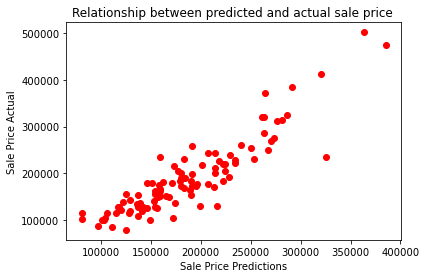

In [423]:
plt.scatter(predictions, y_test, color='r')
plt.title("Relationship between predicted and actual sale price ")
plt.xlabel("Sale Price Predictions")
plt.ylabel("Sale Price Actual")
# plt.savefig('model.jpg', bbox_inches="tight")

(array([ 4.,  2., 14., 33., 26., 11.,  4.,  4.,  1.,  1.]),
 array([-90007.19609235, -67129.44680843, -44251.69752451, -21373.94824059,
          1503.80104333,  24381.55032725,  47259.29961117,  70137.04889509,
         93014.79817901, 115892.54746293, 138770.29674685]),
 <BarContainer object of 10 artists>)

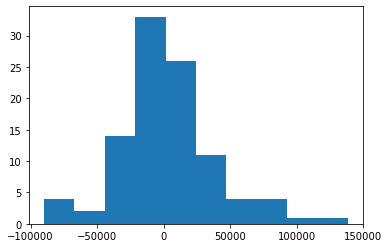

In [400]:
# The below histogram should resemble a normal distribution which it does.
plt.hist(y_test - predictions)

[Back to top](#Index)

## Conclusion

After analyzing different models that contained different quantities of independent variables, I learned that the combination of independent variables that produced the best score when applied to the test dataset was OverallQual, ExterQual, GrLivArea, GarageArea, KitchenQual, and GarageCars.  I learned that adding more independent variables to the model did not always increase the score of the model, and sometimes it decreased the score.  



[Back to top](#Index
)
## References



* Dhingra, Deepanshi. "All you need to know about your first Machine Learning model – Linear Regression." Analytics Vidhya. Data Science Blogathon, May 25, 2021. https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=In%20the%20most%20simple%20words,the%20dependent%20and%20independent%20variable.

* Moffitt, Chris. "Guide to Encoding Categorical Values in Python." Practical Business Python. February 06, 2017. https://pbpython.com/categorical-encoding.html. 

* Zach. "How to Plot Line of Best Fit in Python (With Examples)." Statology. October 05, 2021. https://www.statology.org/line-of-best-fit-python/.